In [1]:
import pandas

In [2]:
music_df = pandas.read_csv("music_data.csv")

In [3]:
music_df.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri,name
0,0.923,0.0561,136.010,0.0440,0.00980,0.000000,4,0.602,5,216013,-3.763,0.765,1,audio_features,spotify:track:1yjY7rpaAQvKwpdUliHx0d,Still Into You
1,0.651,0.1110,90.011,0.0306,0.02910,0.000003,4,0.589,6,212627,-5.097,0.166,1,audio_features,spotify:track:1brwdYwjltrJo7WHpIvbYt,Faded
2,0.738,0.6890,97.021,0.0292,0.11700,0.000384,4,0.638,6,243147,-4.976,0.657,0,audio_features,spotify:track:4BdGO1CaObRD4La9l5Zanz,Sit Next to Me
3,0.950,0.7090,96.082,0.0625,0.00996,0.000096,4,0.574,0,178840,-6.297,0.289,1,audio_features,spotify:track:7DFk01bs34zPldpuAQsfwY,Kill Your Heroes
4,0.616,0.0928,101.883,0.0328,0.18600,0.000000,4,0.532,10,223147,-7.074,0.292,0,audio_features,spotify:track:3pWcj8hxj3fsb9TDAcMpEl,Somebody


In [4]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [5]:
music_df.shape

(99, 16)

In [147]:
%matplotlib inline

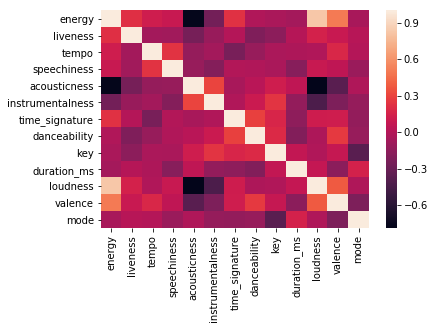

In [6]:
sns.heatmap(music_df.corr())

In [7]:
music_df.drop(['energy','loudness'], axis=1, inplace=True)

In [8]:
music_df.head()

,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,valence,mode,type,uri,name
0,0.0561,136.010,0.0440,0.00980,0.000000,4,0.602,5,216013,0.765,1,audio_features,spotify:track:1yjY7rpaAQvKwpdUliHx0d,Still Into You
1,0.1110,90.011,0.0306,0.02910,0.000003,4,0.589,6,212627,0.166,1,audio_features,spotify:track:1brwdYwjltrJo7WHpIvbYt,Faded
2,0.6890,97.021,0.0292,0.11700,0.000384,4,0.638,6,243147,0.657,0,audio_features,spotify:track:4BdGO1CaObRD4La9l5Zanz,Sit Next to Me
3,0.7090,96.082,0.0625,0.00996,0.000096,4,0.574,0,178840,0.289,1,audio_features,spotify:track:7DFk01bs34zPldpuAQsfwY,Kill Your Heroes
4,0.0928,101.883,0.0328,0.18600,0.000000,4,0.532,10,223147,0.292,0,audio_features,spotify:track:3pWcj8hxj3fsb9TDAcMpEl,Somebody


In [9]:
name = music_df['name']

In [10]:
type(name)

pandas.core.series.Series

In [11]:
music_df.drop(['type', 'uri', 'name'], axis=1, inplace=True)
music_df.head()

,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,valence,mode
0,0.0561,136.010,0.0440,0.00980,0.000000,4,0.602,5,216013,0.765,1
1,0.1110,90.011,0.0306,0.02910,0.000003,4,0.589,6,212627,0.166,1
2,0.6890,97.021,0.0292,0.11700,0.000384,4,0.638,6,243147,0.657,0
3,0.7090,96.082,0.0625,0.00996,0.000096,4,0.574,0,178840,0.289,1
4,0.0928,101.883,0.0328,0.18600,0.000000,4,0.532,10,223147,0.292,0


In [12]:
#normalize the data
from sklearn import preprocessing
x = music_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pandas.DataFrame(x_scaled, columns=music_df.columns)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
#normalize the data again
x = principalDf.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pandas.DataFrame(x_scaled, columns=principalDf.columns)

In [15]:
df.head()

,principal component 1,principal component 2
0,0.262057,0.213815
1,0.251278,0.414743
2,0.731890,0.088016
3,0.035222,0.177863
4,0.863351,0.341728


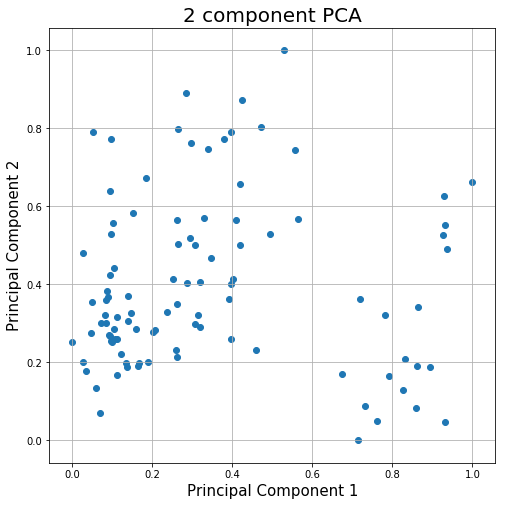

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(df['principal component 1'], df['principal component 2'])
ax.grid()

In [17]:
array = df.as_matrix(columns=None)

/Users/kailee/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [18]:
model = cluster.AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
model.fit(array)
clust_labels2 = model.predict(array)
cent2 = model.cluster_centers_
affinity = pd.DataFrame(clust_labels2)

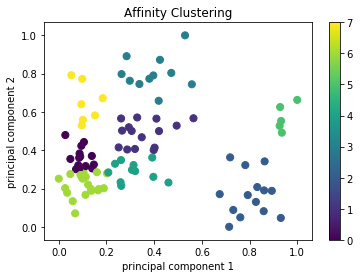

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['principal component 1'], df['principal component 2'], c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.colorbar(scatter)

In [20]:
df['name']=name
df.head()

,principal component 1,principal component 2,name
0,0.262057,0.213815,Still Into You
1,0.251278,0.414743,Faded
2,0.731890,0.088016,Sit Next to Me
3,0.035222,0.177863,Kill Your Heroes
4,0.863351,0.341728,Somebody


In [21]:
print(clust_labels2)

[4 1 2 6 2 7 1 0 5 1 2 3 6 6 0 0 1 2 3 1 0 6 1 6 4 3 0 2 2 0 2 6 2 6 3 3 3
 4 3 4 1 1 0 0 3 2 1 4 1 4 5 6 5 0 2 0 1 0 2 6 5 4 6 7 7 6 6 0 6 1 3 2 6 1
 6 6 1 2 3 7 6 6 6 0 4 1 7 0 2 6 4 5 6 7 4 3 6 4 7]


In [22]:
df['cluster_label'] = clust_labels2

In [41]:
clusters = list(clust_labels2)

In [23]:
df.head()

,principal component 1,principal component 2,name,cluster_label
0,0.262057,0.213815,Still Into You,4
1,0.251278,0.414743,Faded,1
2,0.731890,0.088016,Sit Next to Me,2
3,0.035222,0.177863,Kill Your Heroes,6
4,0.863351,0.341728,Somebody,2


In [24]:
colors = []
for i, row in df.iterrows():
    colors.append((row['principal component 1'], row['principal component 2'], 1))

In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [26]:
points = []
for i, row in df.iterrows():
    points.append([row['principal component 1'], row['principal component 2']])

In [27]:
vor = Voronoi(points)

In [28]:
for i in range(len(colors)):
    R = int(255 * colors[i][0])
    G = int(255 * colors[i][1])
    B = int(255 * colors[i][2])
    colors[i] = '#%02x%02x%02x' % (R, G, B)
    i += 1

In [189]:
print(colors)

['#4236ff', '#4069ff', '#ba16ff', '#082dff', '#dc57ff', '#1887ff', '#5167ff', '#2552ff', '#ffa8ff', '#6890ff', '#ed0bff', '#56beff', '#0633ff', '#1a48ff', '#154cff', '#155bff', '#5877ff', '#c752ff', '#8ebdff', '#9090ff', '#124cff', '#2a32ff', '#6566ff', '#1940ff', '#753aff', '#4bc2ff', '#1a70ff', '#ca2aff', '#e32fff', '#0c5aff', '#d221ff', '#1744ff', '#b75cff', '#1b42ff', '#65c9ff', '#60c5ff', '#78ccff', '#514aff', '#6cdeff', '#6542ff', '#4380ff', '#7e86ff', '#235eff', '#1c50ff', '#6aa7ff', '#ac2bff', '#6669ff', '#4258ff', '#4d7fff', '#4e4bff', '#ec86ff', '#1c2aff', '#ed8cff', '#077aff', '#db14ff', '#234dff', '#4a84ff', '#1451ff', '#b600ff', '#0040ff', '#ec9fff', '#3c53ff', '#2848ff', '#198eff', '#19c5ff', '#1941ff', '#222fff', '#165dff', '#1f38ff', '#5391ff', '#43cbff', '#db30ff', '#3347ff', '#4290ff', '#0e22ff', '#1844ff', '#4966ff', '#c20cff', '#48e3ff', '#18a3ff', '#0c46ff', '#1c42ff', '#1111ff', '#186bff', '#4f52ff', '#6b7fff', '#2694ff', '#1661ff', '#d434ff', '#2a30ff', '#635cff'

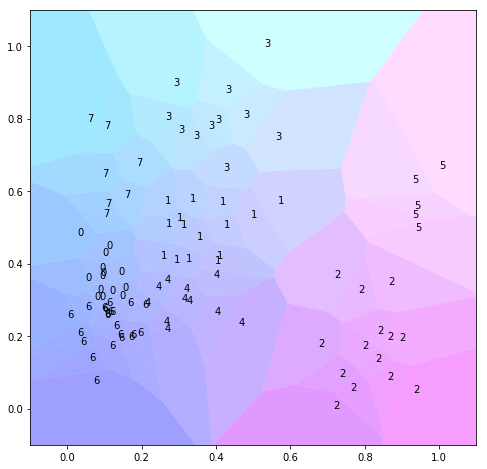

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def voronoi_finite_polygons_2d(vor, radius=None):

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

# colorize
i=0
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), colors[i], alpha=0.4)
    i+=1

for i in range(99):
    plt.text(vor.points[i][0], vor.points[i][1], clusters[i])
    
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()


In [43]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
c7 = []
for i, row in df.iterrows():
    if row[3] == 0:
        c0.append(row[2])
    elif row[3] == 1:
        c1.append(row[2])
    elif row[3] == 2:
        c2.append(row[2])
    elif row[3] == 3:
        c3.append(row[2])
    elif row[3] == 4:
        c4.append(row[2])
    elif row[3] == 5:
        c5.append(row[2])
    elif row[3] == 6:
        c6.append(row[2])
    elif row[3] == 7:
        c7.append(row[2])

In [44]:
print(c0)

['Pray For Me (with Kendrick Lamar)', 'Wild Heart', 'Synesthesia', 'Your Heart Is An Empty Room', 'Alaska', 'Unsteady', 'Cocaine Jesus', 'Him & I (with Halsey)', "Rubik's Cube", "Let's Talk About Spaceships", 'Deliverance', 'Sad Song (feat. Elena Coats)', 'First Light', 'Medicine']


In [45]:
print(c1)

['Faded', 'Lately', 'Deadwater', "Don't Wanna Know", 'I Need My Girl', 'Sweater Weather', 'Maurine', 'Stolen Dance', 'Creature Comfort', 'Handyman', 'Perfect', 'I Spend Too Much Time in My Room', 'Fly Away With Me', 'Sometime Around Midnight', "When I'm Small"]


In [46]:
print(c2)

['Sit Next to Me', 'Somebody', 'Girls/Girls/Boys', 'About You', 'Riverman', 'Mercy', 'Naive', 'Disarm', 'Thank God For Girls', 'I Write Sins Not Tragedies', 'Stressed Out', 'Dead Century', 'All Of The People', 'back again']


In [47]:
print(c3)

['Atlas Hands', 'Heart Skipped A Beat', 'Lessons in Miscommunication Pt II', 'White Lie', 'Skin - Acoustic Version', 'Nobody Else Will Be There', 'Smoke Signals', 'Praying', 'Ms', 'From Gold', 'Madeline']


In [48]:
print(c4)

['Still Into You', 'Infinite High', 'Trojans', 'Dead Oaks', "Tonight You're Perfect", 'The Gold', 'Leave a Light On', 'broken', 'Drugs & Candy', 'Handlebars', 'Georgia']


In [49]:
print(c5)

['Crystalised', 'Nicest Thing', 'Night Time', 'Intro', 'Youth feat. Khalid']


In [50]:
print(c6)

['Kill Your Heroes', 'Synthesizers', 'Believe', 'Superheroes', "I'm Just A Kid", 'Contagious', 'Colors', 'Repeat', 'Dig Down', 'Tongue Tied', 'All For You', 'Super America', 'Turn Off This Song and Go Outside', 'Fire Escape', 'Josie', 'Mind-Reader', 'Stardust', 'Kamikaze', 'My Paper Heart', 'Young Presidents', 'Cecilia And The Satellite', 'Hang Me Up To Dry']


In [51]:
print(c7)

['Sunny December', 'Be Everything', 'Killer', 'Youth', 'I Dare You', 'Appointments', 'Dead Hearts']
